In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
%ls

 Volume in drive C is SSD-OS
 Volume Serial Number is 0A8B-F118

 Directory of C:\Users\THE ONE

30-01-2025  15:37    <DIR>          .
30-01-2025  15:37    <DIR>          ..
03-10-2024  23:10    <DIR>          .android
24-09-2022  11:24    <DIR>          .astropy
31-05-2023  23:06             1,871 .bash_history
16-03-2022  15:56    <DIR>          .conda
03-09-2022  11:31    <DIR>          .cufflinks
15-03-2023  23:26                55 .gitconfig
30-01-2025  13:10    <DIR>          .ipynb_checkpoints
23-01-2022  13:57    <DIR>          .ipython
29-01-2022  13:02    <DIR>          .jupyter
03-06-2022  23:22    <DIR>          .matplotlib
01-07-2022  15:05    <DIR>          .ms-ad
03-02-2022  22:31    <DIR>          .spyder-py3
27-11-2024  14:24    <DIR>          .vscode
15-10-2023  22:44             6,989 -1.14-windows.xml
03-02-2022  13:01            15,038 21st dec 2021.ipynb
25-03-2022  15:03             9,321 23rd dec  about fuctions.ipynb
24-01-2021  21:16    <DIR>          3D Objec

In [9]:
data = pd.read_csv("superstor1.csv")

In [12]:
df= data
df.head(6)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694


In [49]:
gb = df.groupby(["Ship Mode","State"]).agg({"City": "min", "Sales" : "max"})
print(gb)

                                      City     Sales
Ship Mode      State                                
First Class    Alabama             Decatur  3040.000
               Arizona                Mesa   899.136
               Arkansas       Fayetteville   691.960
               California          Anaheim  4799.984
               Colorado             Aurora   703.710
...                                    ...       ...
Standard Class Virginia         Alexandria  3499.930
               Washington           Auburn  3393.680
               West Virginia      Wheeling   447.840
               Wisconsin          Appleton  1951.840
               Wyoming            Cheyenne  1603.136

[176 rows x 2 columns]


In [140]:
gb1 = df.groupby(["Sub-Category","Region","Category","Segment"]).agg({"Sales": "max","Profit" : "max",})
print(gb1.head())

                                               Sales    Profit
Sub-Category Region  Category   Segment                       
Accessories  Central Technology Consumer     1649.75  544.4175
                                Corporate     655.90  275.4780
                                Home Office  1928.78  829.3754
             East    Technology Consumer     2309.65  762.1845
                                Corporate    1319.80  395.9604


In [110]:
import seaborn as sns


In [162]:
gb2 = df.groupby(["Category","Sub-Category"]).agg({"Sales": "min","Profit" : "min","Discount": "min"})
print(gb2)

                                Sales     Profit  Discount
Category        Sub-Category                              
Furniture       Bookcases      35.490 -1665.0522       0.0
                Chairs         26.640  -630.8820       0.0
                Furnishings     1.892  -427.4500       0.0
                Tables         24.368 -1862.3124       0.0
Office Supplies Appliances      0.444 -1181.2824       0.0
                Art             1.344     0.1533       0.0
                Binders         0.556 -3701.8928       0.0
                Envelopes       1.632     0.5508       0.0
                Fasteners       1.240   -11.8256       0.0
                Labels          2.088     0.6786       0.0
                Paper           3.380     1.0700       0.0
                Storage         4.464  -337.8060       0.0
                Supplies        1.744 -1049.3406       0.0
Technology      Accessories     0.990   -75.5958       0.0
                Copiers       299.990    59.9980       0

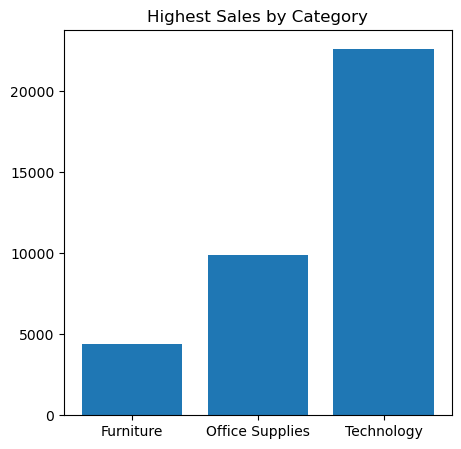

In [163]:
plt.figure(figsize=(5,5))
plt.bar(df["Category"],df["Sales"])
plt.title('Highest Sales by Category')
plt.show()

In [171]:
gb3 = df.groupby(["Profit","Sub-Category"]).agg({"Sales": "max"})
print(gb3)

                             Sales
Profit     Sub-Category           
-6599.9780 Machines       4499.985
-3839.9904 Machines       7999.980
-3701.8928 Binders        2177.584
-3399.9800 Machines       2549.985
-2929.4845 Binders        1889.990
...                            ...
 4630.4755 Binders        9449.950
 4946.3700 Binders        9892.740
 5039.9856 Copiers       10499.970
 6719.9808 Copiers       13999.960
 8399.9760 Copiers       17499.950

[7582 rows x 1 columns]


In [145]:
import seaborn as sns

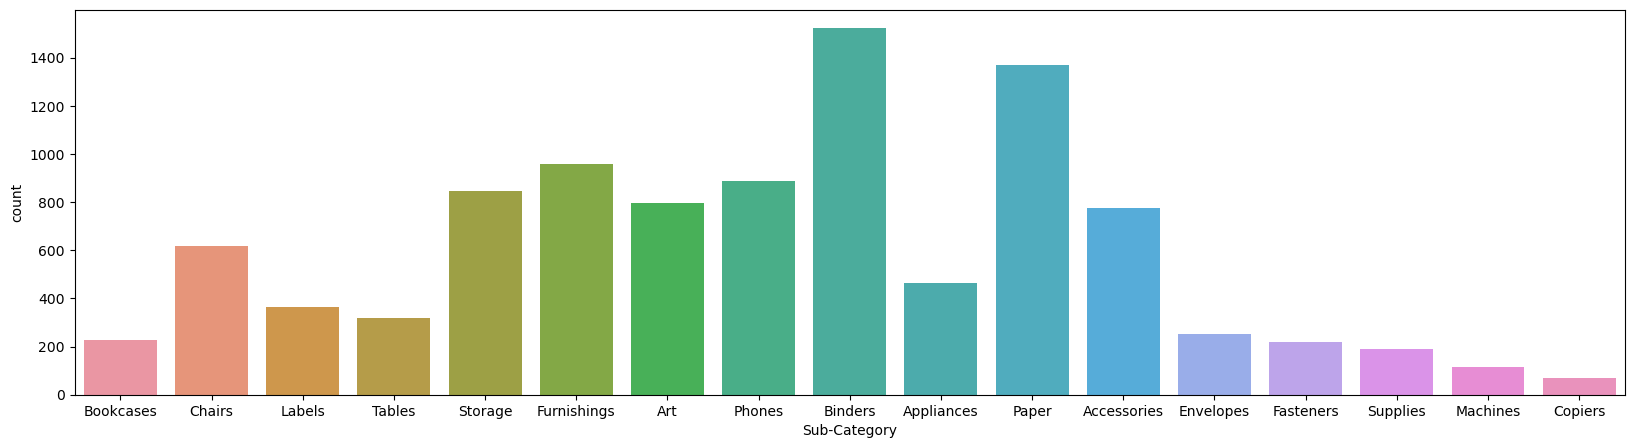

In [148]:
plt.figure(figsize=(20,5))
sns.countplot(data = df, x =(df["Sub-Category"]),)
plt.show()


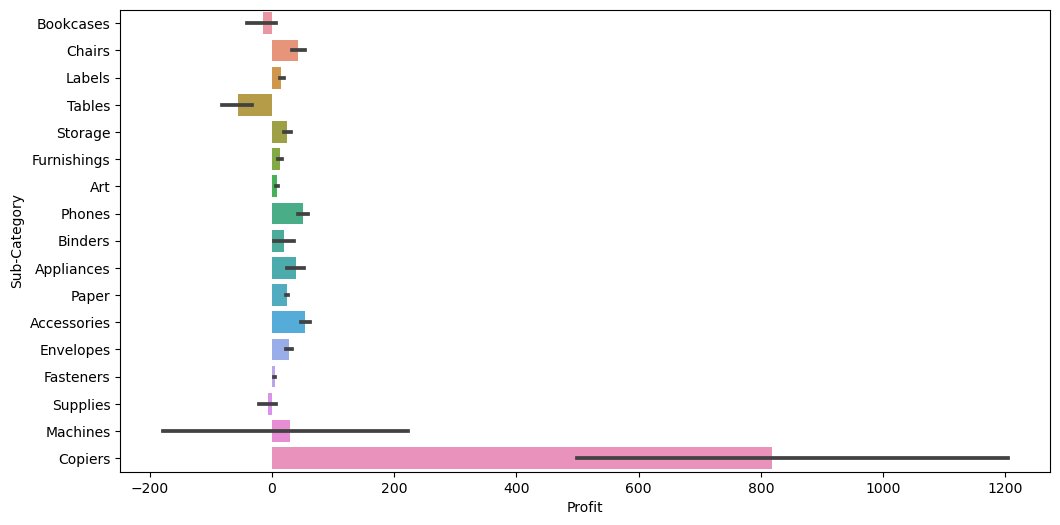

In [178]:
plt.figure(figsize=(12, 6))
sns.barplot(y= df["Sub-Category"], x = df["Profit"], orient = "h")
plt.show()